In [1]:
from my_weapon import *
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from collections import Counter
sns.set(style="darkgrid", font_scale=1.5)

In [2]:
list_prob = []

for line in tqdm(open("disk/data/predict_results_with_proba_LR.json")):
        d = json.loads(line.strip())
        uid = d["user_id"]
        for prob in d["LR"]:
            list_prob.append(float(prob))

In [3]:
list_prob = pd.Series(list_prob)

In [4]:
list_prob.describe()

count    1.825800e+07
mean     4.617697e-01
std      3.370257e-01
min      5.604502e-10
25%      1.389755e-01
50%      4.170358e-01
75%      7.906873e-01
max      1.000000e+00
dtype: float64

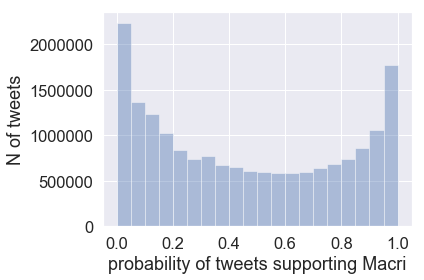

In [5]:
sns.distplot(list_prob, kde=False, bins=20)
plt.ylabel("N of tweets")
plt.xlabel("probability of tweets supporting Macri")
plt.tight_layout()
plt.savefig("supporting_macri.png", dpi=100)
plt.show()

In [71]:
def predict_users(clas_name, C=1):
    K, M, U = 0, 0, 0 
#     rst = {}
    print(clas_name, C)
    for line in tqdm(open("disk/data/predict_results_with_proba-20190411.json")):
        d = json.loads(line.strip())
        if sum(d[clas_name]) >= C:
            if d[clas_name][0] > d[clas_name][1]:
                K += 1
            elif d[clas_name][0] < d[clas_name][1]:
                M += 1
            elif d[clas_name][0] == d[clas_name][1]:
                U += 1
    _sum = K + M + U
    return K, M, U, K /_sum, M / _sum, U / _sum

In [81]:
def predict_users_3(clas_name, C=1):
    K, M, A, U = 0, 0, 0, 0
#     rst = {}
    print(clas_name, C)
    tweet_count = 0
    for line in tqdm(open("disk/data/predict_results_with_proba-20190411.json")):
        d = json.loads(line.strip())
        tweet_count += sum(d[clas_name])
        if sum(d[clas_name]) >= C:
            r = d[clas_name]
            
            if r[0] > r[1] and r[0] > r[2]:
                K += 1
                
            elif r[1] > r[0] and r[1] > r[2]:
                M += 1
                
            elif r[2] > r[0] and r[1] > r[0]:
                A += 1
                
            else:
                U += 1
    
    _sum = K + M + U + A
    print("tweet count", tweet_count, "user count", _sum)
    return K, M, A, U, K /_sum, M / _sum, A / _sum, U / _sum

print(predict_users("LR", C=1))
print(predict_users("LR", C=3))
print(predict_users("LR", C=5))
print(predict_users("LR", C=10))

In [82]:
print(predict_users_3("LR", C=1))
print(predict_users_3("LR", C=3))
print(predict_users_3("LR", C=5))
print(predict_users_3("LR", C=10))

LR 1


tweet count 26132000 user count 3819010
(2198685, 1239377, 2723, 378225, 0.5757211947598985, 0.3245283463515414, 0.0007130120109661929, 0.09903744687759393)
LR 3


tweet count 26132000 user count 1412923
(787695, 512650, 285, 112293, 0.5574932250377409, 0.36282939693104294, 0.0002017095057550907, 0.07947566852546105)
LR 5


tweet count 26132000 user count 848718
(449561, 345667, 139, 53351, 0.529694197601559, 0.4072813349074722, 0.00016377642514946072, 0.06286069106581928)
LR 10


tweet count 26132000 user count 401691
(183557, 198321, 36, 19777, 0.45696069864647204, 0.49371531849107897, 8.9621126686931e-05, 0.04923436173576207)


In [73]:
print(predict_users("SVC", C=1))
print(predict_users("SVC", C=3))
print(predict_users("SVC", C=5))
print(predict_users("SVC", C=10))

SVC 1



(1807168, 1018911, 320800, 0.5742731131384461, 0.323784613262855, 0.1019422735986989)
SVC 3



(592023, 371116, 92533, 0.5608020294182284, 0.3515447980054411, 0.08765317257633053)
SVC 5



(326429, 237093, 43630, 0.5376396684849922, 0.39050023717289906, 0.07186009434210873)
SVC 10



(130260, 129633, 16896, 0.4706111875833216, 0.4683459241516101, 0.06104288826506834)


In [74]:
print(predict_users("NB", C=1))
print(predict_users("NB", C=3))
print(predict_users("NB", C=5))
print(predict_users("NB", C=10))

NB 1



(1697780, 1114547, 334552, 0.5395123231620917, 0.35417535914154946, 0.10631231769635884)
NB 3



(564456, 395537, 95679, 0.5346888048560537, 0.37467793026621904, 0.09063326487772717)
NB 5



(315536, 247679, 43937, 0.5196985268927715, 0.40793573932063143, 0.0723657337865971)
NB 10



(128816, 131479, 16494, 0.46539421725574354, 0.4750152643349266, 0.05959051840932985)


In [51]:
def predict_users(self):
    # list_classifiers = ['LR', 'SVC', 'NB', 'RF', 'DT']
    list_classifiers = ['LR']
    rst = {}
    for clas in list_classifiers:
        rst[clas] = {"K": 0, "M": 0, "U": 0}
    for line in open("disk/data/predict_results.json"):
        d = json.loads(line.strip())
        for clas in list_classifiers:
            if d[clas][0] > d[clas][1]:
                rst[clas]["K"] += 1
            elif d[clas][0] < d[clas][1]:
                rst[clas]["M"] += 1
            elif d[clas][0] == d[clas][1]:
                rst[clas]["U"] += 1
    pd.DataFrame(rst).to_csv("rst.csv")

In [52]:
rst = predict_users("LR")

In [48]:
import collections

cx = [1, 2, 3, 5, 10]

for c in cx:
    camps_cnt = collections.Counter()
    for uid, v in rst.items():
        if (v[0] + v[1]) >= c:
            if v[0] > v[1]: # Cristina
                camp = "Num of supporting K"
            elif v[0] < v[1]:
                camp = "Num of supporting M"
            else:
                camp = "Unclassified"

            camps_cnt[camp] +=1
    print("c={}".format(c), camps_cnt)
    

c=1 Counter({'Num of supporting K': 1960405, 'Num of supporting M': 890638, 'Unclassified': 295836})
c=2 Counter({'Num of supporting K': 906086, 'Num of supporting M': 399348, 'Unclassified': 295836})
c=3 Counter({'Num of supporting K': 648777, 'Num of supporting M': 322290, 'Unclassified': 84605})
c=5 Counter({'Num of supporting K': 359951, 'Num of supporting M': 207072, 'Unclassified': 40129})
c=10 Counter({'Num of supporting K': 146502, 'Num of supporting M': 114550, 'Unclassified': 15737})


In [26]:
rst = {}

for line in tqdm(open("disk/data/predict_results_with_proba_LR.json")):
    d = json.loads(line.strip())
    uid = d["user_id"]
    M_cnt = 0
    K_cnt = 0
    
    for prob in d["LR"]:
        if float(prob) > 0.5:
            M_cnt += 1
        else:
            K_cnt += 1
            
    if (M_cnt + K_cnt) > 0:
        rst[uid] = M_cnt + K_cnt

In [27]:
d = pd.Series(list(rst.values()))

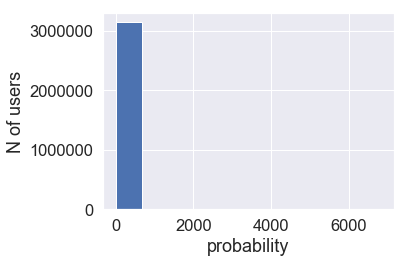

In [28]:
d.hist(bins=10)
plt.ylabel("N of users")
plt.xlabel("probability")
plt.tight_layout()
plt.savefig("supporting_macri.png", dpi=100)
plt.show()

In [12]:
d = pd.Series(list(rst.values()))

In [17]:
%matplotlib inline

def get_cdf_pdf(data, mini=0, maxi=0, step=0, norm=True):
    if maxi == 0:
        maxi = data.max()
        print("max(x):", maxi)
    if step == 0:
        step = int((maxi - mini) / 20)
        if step == 0:
            step = 1
    x = np.arange(mini, maxi, step, dtype=np.float32)
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

In [18]:
d.describe()

count    3.146879e+06
mean     5.801939e+00
std      3.727474e+01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      6.836000e+03
dtype: float64

In [19]:
x, cdf, pdf = get_cdf_pdf(d)

max(x): 6836


In [ ]:
plt.plot(x, cdf)

In [38]:
from datetime import datetime

cnt = pd.read_csv("data/support-rst-20190412.csv").set_index("dt")

In [39]:
cnt

,A,K,M,U
dt,,,,
2019-03-04,1115,633932,480113,110633
2019-03-11,880,670343,476446,113479
2019-03-18,1342,728858,455992,119192
2019-03-25,1124,692525,424310,105633
2019-04-01,1200,672678,469878,117068
2019-04-08,1377,675776,416878,105206
2019-04-15,1110,594896,421775,96627


In [40]:
cnt.index = pd.to_datetime(cnt.index)

In [41]:
cnt["Massa"] = cnt["A"] / (cnt["A"] + cnt["K"] + cnt["M"])
cnt["Cristina"] = cnt["K"] / (cnt["A"] + cnt["K"] + cnt["M"])
cnt["Macri"] = cnt["M"] / (cnt["A"] + cnt["K"] + cnt["M"])

In [42]:
cnt = cnt[["Cristina", "Macri", "Massa"]]

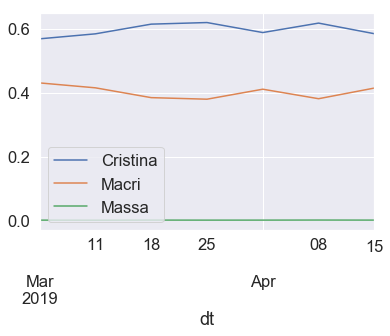

In [43]:
cnt.plot()

In [45]:
cnt.to_csv("data/rst_20190412.csv", float_format="%.3f")

## 2019-04-16 update

In [84]:
import pendulum

dict_dt = {}

for line in tqdm(open("disk/data/20190415-predicted.txt")):
    w = line.strip().split(",")
    uid = w[0]

    dt = pendulum.parse(w[1])
#     dt = dt.add(days=(8 - dt.day_of_week))
#     dt = dt.format("YYYYMMDD")

    if dt not in dict_dt:
        dict_dt[dt] = {"K": 0, "M": 0, "U": 0}
    
    proba_M = float(w[2][1:-1].split()[1])
    if proba_M > 0.75:
        dict_dt[dt]["M"] += 1
    elif proba_M < 0.25:
        dict_dt[dt]["K"] += 1
    else:
        dict_dt[dt]["U"] += 1
#     print(uid, dt, proba_M)

In [85]:
_dict_dt = []

for dt, v in dict_dt.items():
    dt = dt.format("YYYY-MM-DD")
    if "2019-03-01" <= dt < "2019-04-16":
        _dict_dt.append({
            "dt": dt,
            "Cristina": v["K"],
            "Macri": v["M"],
            "Unclassified": v["U"]
        })

In [86]:
df = pd.DataFrame(_dict_dt)
cnt = df.set_index(df.dt)
cnt.index = pd.to_datetime(cnt.index)
cnt

,Cristina,Macri,Unclassified,dt
dt,,,,
2019-03-01,204598,299930,270251,2019-03-01
2019-03-02,174165,252383,232756,2019-03-02
2019-03-03,136002,336847,212222,2019-03-03
2019-03-04,151557,227896,204105,2019-03-04
2019-03-05,155703,167618,211330,2019-03-05
2019-03-06,141842,167656,206283,2019-03-06
2019-03-07,169308,189362,218603,2019-03-07
2019-03-08,151831,147246,215970,2019-03-08
2019-03-09,115623,150725,175607,2019-03-09


In [81]:
cnt.to_csv("web/data/tweet_num_20190415.csv")

In [87]:
import pendulum

dict_dt_users = {}

for line in tqdm(open("disk/data/20190415-predicted.txt")):
    w = line.strip().split(",")
    uid = w[0]

    dt = pendulum.parse(w[1])
    dt = dt.add(days=(8 - dt.day_of_week))
    dt = dt.format("YYYYMMDD")

    if dt not in dict_dt_users:
        dict_dt_users[dt] = {}
    if uid not in dict_dt_users[dt]:
        dict_dt_users[dt][uid] = []
    
    proba_M = float(w[2][1:-1].split()[1])
    dict_dt_users[dt][uid].append(proba_M)
#     print(uid, dt, proba_M)

N表示发布了多少条tweets，P表示概率阈值

In [13]:
rst = []

for N in tqdm(range(1, 41)):
    for P in np.arange(0.5, 0.8, 0.05):
        dt_rst = []
        for dt, user_d in dict_dt_users.items():
            M_u = 0
            C_u = 0
            U_u = 0
            for uid, t in user_d.items():
                if len(t) >= N:
                    M_pro = 0
                    C_pro = 0
                    for proba in t:
                        if proba > P:
                            M_pro += 1
                        elif (1 - proba) > P:
                            C_pro += 1
                        
                    if M_pro > C_pro:
                        M_u += 1
                    elif M_pro < C_pro:
                        C_u += 1
                    else:
                        U_u += 1
                        
            dt_rst.append({
                "dt": dt,
                "K": C_u,
                "M": M_u,
                "U": U_u,
            })
        # end dt loop
            
        rst.append({
            "N": N,
            "P": P,
            "rst": dt_rst, 
        })

In [15]:
_rst = rst

In [18]:
# json.dump(_rst, open("data/dt_pro-20190415.json", "w"))

In [99]:
_rst = json.load(open("data/dt_pro-20190415.json"))
rst = _rst

In [100]:
for i, d in enumerate(_rst):
    dt_rst = [r for r in d["rst"] if '20190304' <= r['dt'] <= '20190415']
    _rst[i]['rst'] = dt_rst

In [101]:
from datetime import datetime

wiki = pd.read_csv("web/data/wiki-data.csv")
wiki

,dt,Cristina,Macri
0,2019-04-09,41.3,33.6
1,2019-04-07,41.1,37.1
2,2019-04-06,50.9,49.1
3,2019-04-02,41.0,38.0
4,2019-03-19,46.5,31.3
5,2019-03-14,49.0,51.0
6,2019-03-13,37.4,34.3
7,2019-03-10,51.0,39.1
8,2019-03-09,49.2,50.8
9,2019-03-08,35.7,35.1


In [102]:
wiki.dt = pd.to_datetime(wiki.dt, format='%Y-%m-%d')

In [103]:
wiki = wiki.set_index(wiki.dt)

In [104]:
wiki["Poll_Cristina"] = wiki["Cristina"] / (wiki["Cristina"] + wiki["Macri"])
wiki["Poll_Macri"] = wiki["Macri"] / (wiki["Cristina"] + wiki["Macri"])
wiki = wiki[["Poll_Cristina", "Poll_Macri"]]

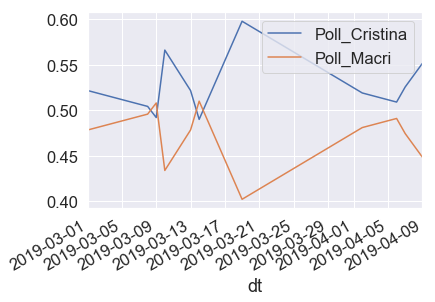

In [105]:
wiki.plot()

In [106]:
wiki.to_csv("data/poll_20190415.csv", float_format="%.3f")

In [123]:
sns.set_style("darkgrid")

for d in tqdm(_rst):
    if d["P"] == 0.7500000000000002 and d["N"] == 3:
        print(d["P"], d["N"])
        df = pd.DataFrame(d['rst'])
        cnt = df.set_index(df.dt)
        cnt.index = pd.to_datetime(cnt.index)
        cnt["Cristina"] = cnt["K"] / (cnt["K"] + cnt["M"])
        cnt["Macri"] = cnt["M"] / (cnt["K"] + cnt["M"])
        cnt = cnt[["Cristina", "Macri"]]

        plt.plot(cnt.index, cnt["Cristina"], "*-", label="K")
        plt.plot(cnt.index, cnt["Macri"], label="M")
        plt.plot(wiki.index, wiki["Poll_Cristina"], "*--", label="Poll_K")
        plt.plot(wiki.index, wiki["Poll_Macri"], "--", label="Poll_M")
        
        print(cnt)
#         cnt.to_csv("web/Twitter_dynamics-20190415.csv", float_format="%.3f")

        plt.ylim(0.35, 0.65)
        plt.title("N={}, P={:.2f}".format(d['N'], d['P']))
        plt.xticks(fontsize=11, rotation=45)
        plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
        plt.tight_layout()
        plt.savefig("fig/N={}, P={:.2f}.png".format(d['N'], d['P']), dpi=300)
    #     plt.show()
        plt.close()
    # break
    # print(cnt)

0.7500000000000002 3
            Cristina     Macri
dt                            
2019-03-04  0.382165  0.617835
2019-03-11  0.377963  0.622037
2019-03-18  0.459482  0.540518
2019-03-25  0.429427  0.570573
2019-04-01  0.399254  0.600746
2019-04-08  0.438751  0.561249
2019-04-15  0.403810  0.596190



In [124]:
new_data = pd.concat([wiki, cnt], sort=True)
new_data = new_data.sort_index()
new_data

,Cristina,Macri,Poll_Cristina,Poll_Macri
dt,,,,
2019-03-01,NaN,NaN,0.521684,0.478316
2019-03-04,0.382165,0.617835,NaN,NaN
2019-03-08,NaN,NaN,0.504237,0.495763
2019-03-09,NaN,NaN,0.492000,0.508000
2019-03-10,NaN,NaN,0.566038,0.433962
2019-03-11,0.377963,0.622037,NaN,NaN
2019-03-13,NaN,NaN,0.521618,0.478382
2019-03-14,NaN,NaN,0.490000,0.510000
2019-03-18,0.459482,0.540518,NaN,NaN


In [125]:
new_data.to_csv("web/tweet_num_20190415-N-3.csv")

In [59]:
df = pd.DataFrame(rst[5]['rst'])
cnt = df.set_index(df.dt)
cnt.index = pd.to_datetime(cnt.index)

In [61]:
cnt.to_csv("web/data/user_num_20190415.csv")

In [10]:
df = pd.read_csv("disk/data/PASO_proba.csv")

Text(0.5, 0, 'probability of supporting Macri for tweets with PASO')

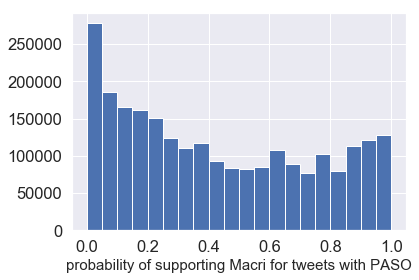

In [13]:
df["proba"].hist(bins=20)
plt.xlabel("probability of supporting Macri for tweets with PASO", fontsize=15)

In [1]:
from collections import Counter

cnt = Counter()

for line in open("disk/data/2019-07-08/tokens.txt"):
    w = line.strip().split(" ")
    for _w in w:
        if _w.startswith("@"):
            cnt[_w] += 1

In [4]:
cnt.most_common(25)

[('@mauriciomacri', 18723),
 ('@cfkargentina', 18347),
 ('@sebastianyatra', 6562),
 ('@alferdez', 4031),
 ('@foreveryatra_ec', 2541),
 ('@gomitwiin', 2438),
 ('@mariuvidal', 2147),
 ('@miguelpichetto', 2023),
 ('@sergiomassa', 1869),
 ('@andradedirak', 1648),
 ('@cambiemos', 1527),
 ('@eldestape_radio', 1514),
 ('@foreveryatrafc', 1438),
 ('@tinistoessel', 1187),
 ('@elisacarrio', 1159),
 ('@eldestapeweb', 1069),
 ('@kicillofok', 892),
 ('@gatosylvestre', 890),
 ('@c5n', 794),
 ('@universalmusice', 763),
 ('@edufeiok', 721),
 ('@todonoticias', 710),
 ('@horaciorlarreta', 696),
 ('@marquitospena', 695),
 ('@magariovero', 628)]